## Assignment 3: $k$ Nearest Neighbor and $k$ Means Clustering

## **Do three questions.**

`! git clone https://www.github.com/ytkidanu/assignment3`

In [1]:
! git clone https://www.github.com/ytkidanu/assignment3



Cloning into 'assignment3'...
remote: Enumerating objects: 11, done.
remote: Counting objects: 100% (4/4), done.
remote: Compressing objects: 100% (3/3), done.
remote: Total 11 (delta 1), reused 1 (delta 1), pack-reused 7
Receiving objects: 100% (11/11), 867.07 KiB | 15.48 MiB/s, done.
Resolving deltas: 100% (1/1), done.


**Q1.** This question is a case study for $k$ nearest neighbor. The target variable `y` is `Purchase` and the features of interest are `Age` and `AnnualSalary`.

1. Load the `./data/car_data.csv` data. Look at the head and dimensions of the data.


In [26]:
import pandas as pd
import pandas as pd
import seaborn as sns
df = pd.read_csv('./assignment3/data/car_data.csv')
print(df.columns)
df.head()


Index(['User ID', 'Gender', 'Age', 'AnnualSalary', 'Purchased'], dtype='object')


,User ID,Gender,Age,AnnualSalary,Purchased
0,385,Male,35,20000,0
1,681,Male,40,43500,0
2,353,Male,49,74000,0
3,895,Male,40,107500,1
4,661,Male,25,79000,0



2. Summarize the variables (`User.ID`, `Gender`, `Age`, `AnnualSalary`, `Purchase`). Are there any missings to clean? Convert the `Gender` categorical variable into a dummy variable that takes the value 0 for male and 1 for female. Create a matrix $X$ of predictors including `Age` and `AnnualSalary`, and an outcome $y$ equaling `Purchase`.


In [34]:
df.describe()


df['Gender'].value_counts()

Female    516
Male      484
Name: Gender, dtype: int64

Female    516
Male      484
Name: Gender, dtype: int64

```
Female    516
Male      484
Name: Gender, dtype: int64```

There is no missing values, total is 1000

In [28]:
df['g'] = 0 # auto set all to 0
df.loc[ df['Gender']== 'Female', 'g'] = 1 # sets female to 1, but keeps male as 0
df['g'].value_counts()

1    516
0    484
Name: g, dtype: int64

In [29]:
# Select features/target variable for analysis:
#y = df['Purchased'] # Create target variable vector
#X = df.loc[:,['Age','AnnualSalary']] # Create feature matrix
#def pn(x):
    #print(x,'\n')
    #return

#pn(X.head())
#pn(X.describe())

vars = ['Age','AnnualSalary']
X = df.loc[:,vars]
y = df['Purchased']

3. MaxMin-normalize `Age` and `AnnualSalary` in `X`.


In [30]:
# Maxmin normalization function:
def maxmin(z):
    z = (z-min(z))/(max(z)-min(z))
    return(z)

# Apply maxmin to each column of X to get U:
X = X.apply(maxmin)
#pn(X.head())
X.describe()

,Age,AnnualSalary
count,1000.000000,1000.000000
mean,0.491244,0.419556
std,0.237935,0.250824
min,0.000000,0.000000
25%,0.311111,0.228182
50%,0.488889,0.414545
75%,0.666667,0.545455
max,1.000000,1.000000


4. Split the sample into a ~80% training dataset and a ~20% testing dataset.


In [49]:
# Split the sample:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=.2,random_state=100)


5. Treat this as a classification problem: The model is supposed to predict 0 or 1 for each customer, classifying them as a purchaser or non-purchaser. Use sklearn to determine the optimal number of neighbors $k$ to use.


[ 8 10 14]


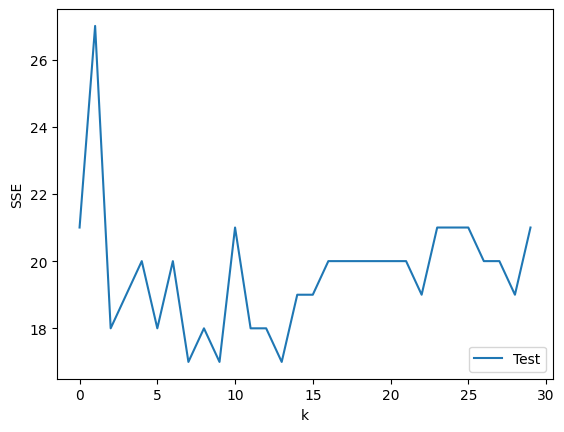

In [50]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.neighbors import KNeighborsClassifier
# # If you wanted to split without sk:
# N = df.shape[0] # Total number of rows
# all_rows = np.arange(N) # Create a list of all row indices
# train_rows = np.random.choice(N,int(.8*N),replace=False) # Draw 80% of the rows for testing
# test_rows = list(set(all_rows)-set(train_rows)) # Find the remaining rows for training
# # Create train/test data:
# X_train = X.iloc[train_rows,:]
# y_train = y.iloc[train_rows]
# X_test = X.iloc[test_rows,:]
# y_test = y.iloc[train_rows]

k_bar = 30 #why is it 30 and not 70 like in the notes
k_grid = np.arange(1,k_bar)
SSE_train = np.zeros(k_bar)
for k in range(k_bar):
    model = KNeighborsClassifier(n_neighbors=k+1) # Create a sk model for k
    fitted_model = model.fit(X_train,y_train) # Train the model on our data
    y_hat = fitted_model.predict(X_test) # Predict values for test set

    SSE_train[k] = np.sum( (y_test-y_hat)**2 ) # Save the computed SSE

SSE_min = np.min(SSE_train) # Lowest recorded SSE
min_index = np.where(SSE_train==SSE_min) # Find the indices of y that equal the minimum
k_star = k_grid[min_index] # Find the optimal value of k
print(k_star)


plt.plot(np.arange(0,k_bar),SSE_train,label='Test') # Plot SSE by k
plt.xlabel("k")
plt.ylabel("SSE")
plt.legend(loc='lower right')

The elbow, or where it improves sharply appears to be around where k=9.

6. Run the model for the optimal number of neighbors on the testing data. Cross tabulate the predicted outcomes against the actual outcomes; this is called a **confusion matrix**. How often does the model predict a sale when one fails to occur? How often does the model predict no sale when one does occur? Overall, does it provide accurate predictions?


In [51]:
model = KNeighborsClassifier(n_neighbors=9)
fitted_model = model.fit(X_train,y_train) # Train the model on our data
y_hat = fitted_model.predict(X_test) # Predict values for test set
pd.crosstab(y_test, y_hat)

col_0,0,1
Purchased,,
0,104,15
1,3,78


7. Now, compute confusion matrices separately for men and women, as in part 6. Does the model make more accurate predictions for one sex or the other? Explain. (Performance of algorithms on population subgroups is a growing topic in data science.)

In [52]:
from sklearn.model_selection import train_test_split
vars = ['Age','AnnualSalary','Gender']
X = df.loc[:,vars]
y = df['Purchased']
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=.2,random_state=100)
# Use the selected k to train the model, not using the gender variable:
model = KNeighborsClassifier(n_neighbors=9) # Create a sk model for k
fitted_model = model.fit(X_train.drop('Gender',axis=1),y_train) # Train the model o
y_hat = fitted_model.predict(X_test.drop('Gender',axis=1)) # Predict values for tes
# Break out the true/predicted values by recorded sex:
y_hat_M = y_hat[ X_test['Gender'] == 'Male']
y_hat_F = y_hat[ X_test['Gender'] == 'Female']
y_M = y_test[ X_test['Gender'] == 'Male']
y_F = y_test[ X_test['Gender'] == 'Female']

pd.crosstab(y_F, y_hat_F)

col_0,0,1
Purchased,,
0,58,9
1,5,33


In [53]:
pd.crosstab(y_M, y_hat_M)

col_0,0,1
Purchased,,
0,45,7
1,15,28


**Q2.** This question is a case study for $k$ nearest neighbor The target variable `y` is `price` and the features are `year` and `mileage`.

1. Load the `./data/USA_cars_datasets.csv`. Keep the following variables and drop the rest: `price`, `year`, `mileage`. Are there any `NA`'s to handle? Look at the head and dimensions of the data.
2. Maxmin normalize `year` and `mileage`.
3. Split the sample into ~80% for training and ~20% for evaluation.
4. Use the $k$NN algorithm for regression and the training data to predict `price` using `year` and `mileage` for the test set for $k=3,10,25,50,100,300$. For each value of $k$, compute the Sum of Squared Error and make a scatterplot showing the test value plotted against the predicted value. What patterns do you notice as you increase $k$?
5. Determine the optimal $k$ for these data.
6. Describe what happened in the plots of predicted versus actual prices as $k$ varied, taking your answer into part 6 into account. (Hint: Use the words "underfitting" and "overfitting".)

In [12]:
import pandas as pd
import pandas as pd
import seaborn as sns
df = pd.read_csv('./assignment3/data/USA_cars_datasets.csv')
#print(df.columns)
#df.head()

selected_variables = ['price', 'year', 'mileage']
df = df[selected_variables]
missing_values = df.isnull().sum()
#df.head()

na_count = df.isna().sum()
print(na_count)

#df.describe()

#df.value_counts()

price      0
year       0
mileage    0
dtype: int64


In [13]:


def maxmin(z):
    z = (z-min(z))/(max(z)-min(z))
    return(z)


X = df.loc[:,['year','mileage']] # Create feature matrix
X = X.apply(maxmin)

df.describe()

,price,year,mileage
count,2499.000000,2499.000000,2.499000e+03
mean,18767.671469,2016.714286,5.229869e+04
std,12116.094936,3.442656,5.970552e+04
min,0.000000,1973.000000,0.000000e+00
25%,10200.000000,2016.000000,2.146650e+04
50%,16900.000000,2018.000000,3.536500e+04
75%,25555.500000,2019.000000,6.347250e+04
max,84900.000000,2020.000000,1.017936e+06


In [14]:
from sklearn.model_selection import train_test_split


# Split the data into training (80%) and evaluation (20%)
X_train, X_test, y_train, y_test = train_test_split(df[['year', 'mileage']], df['price'], test_size=0.2, random_state=100)


k=3: SSE Train=139450386630.8889, SSE Test=63892630628.44444
k=10: SSE Train=195118306259.1, SSE Test=52585303073.590004
k=25: SSE Train=209909002404.8496, SSE Test=53161647868.3584
k=50: SSE Train=215107500045.9244, SSE Test=53721573131.0276
k=100: SSE Train=216662953895.91278, SSE Test=52637155856.5107
k=300: SSE Train=219594261041.81616, SSE Test=52650538124.84375


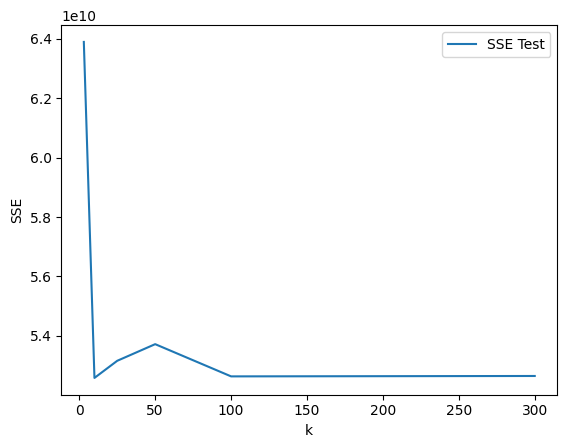

In [15]:
from sklearn.neighbors import KNeighborsRegressor as kNNRegression

from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
import matplotlib.pyplot as plt


k_values = [3, 10, 25, 50, 100, 300]

# Lists to store SSE values for each k
SSE_train_values = []
SSE_test_values = []

for k in k_values:
    model = kNNRegression(n_neighbors=k)  # Create a sk model for k
    fitted_model = model.fit(X_train, y_train)  # Train the model on our data

    # Predict values for test set
    y_hat_test = fitted_model.predict(X_test)
    # Predict values for training set
    y_hat_train = fitted_model.predict(X_train)

    # Calculate SSE for test set
    SSE_test = np.sum((y_test - y_hat_test) ** 2)
    # Calculate SSE for training set
    SSE_train = np.sum((y_train - y_hat_train) ** 2)

    # Append SSE values to the lists
    SSE_train_values.append(SSE_train)
    SSE_test_values.append(SSE_test)

    # Print SSE for the current k
    print(f'k={k}: SSE Train={SSE_train}, SSE Test={SSE_test}')

# Scatter plot for SSE values
#plt.plot(k_values, SSE_train_values, label='SSE Train')
plt.plot(k_values, SSE_test_values, label='SSE Test')
plt.xlabel('k')
plt.ylabel('SSE')
plt.legend()
plt.show()



As the value of k increases in the kNN regression, the data becomes more spread apart on the x-axis and less clustered.

4. When k is small, such as k=3, the model tends to capture noise and fluctuations in the data, leading to a flexible and potentially overfitted model. As k increases, the model becomes more generalized and less influenced by individual data points. This can lead to underfitting, where the model oversimplifies

5. I think the optimal k value is 50.

6. When k=1, SSE was high. With only one neighbor, the model is highly sensitive to individual data points, leading to overfitting. We use too few variables which cannot capture the complex relationships between the features and target variable.

At k=50, The model seems to perform well, and the predicted values align reasonably well with the actual prices. The model finds a good balance between capturing the underlying patterns in the data and avoiding excessive sensitivity to individual points. This is often considered a sweet spot, providing a model that generalizes well to new data.

At k=100, the model is good at minimizing the sum of squared errors and the performance remains relatively stable. It might miss underlying patterns tho and "smooth" out the data. we are using too many variables which are exploiting too many unique features of the training data, therefore I think it is an example of overfitting.


**Q3.** This question is a case study for $k$ nearest neighbor, particularly variable selection. The data for the question include (summaries reproduced here directly from the codebook):

- age: age of the patient (years)
- anaemia: decrease of red blood cells or hemoglobin (boolean)
- high blood pressure: if the patient has hypertension (boolean)
- creatinine phosphokinase (CPK): level of the CPK enzyme in the blood (mcg/L)
- diabetes: if the patient has diabetes (boolean)
- ejection fraction: percentage of blood leaving the heart at each contraction (percentage)
- platelets: platelets in the blood (kiloplatelets/mL)
- sex: woman or man (binary)
- serum creatinine: level of serum creatinine in the blood (mg/dL)
- serum sodium: level of serum sodium in the blood (mEq/L)
- smoking: if the patient smokes or not (boolean)
- time: follow-up period (days)
- death event: if the patient deceased during the follow-up period (boolean)

1. Load the `./data/heart_failure_clinical_records_dataset.csv`. Are there any `NA`'s to handle? use `.drop()` to remove `time` from the dataframe.
2. Make a correlation matrix. What variables are strongly associated with a death event?
3. For the dummy variables `anaemia`, `diabetes`, `high_blood_pressure`, `sex`, and `smoking`, compute a summary table of `DEATH_EVENT` grouped by the variable. For which variables does a higher proportion of the population die when the variable takes the value 1 rather than 0?
4. On the basis of your answers from 2 and 3, build a matrix $X$ of the variables you think are most predictive of a death, and a variable $y$ equal to `DEATH_EVENT`.
5. Maxmin normalize all of the variables in `X`.
6. Split the sample into ~80% for training and ~20% for evaluation. (Try to use the same train/test split for the whole question, so that you're comparing apples to apples in the questions below.).
7. Determine the optimal number of neighbors for a $k$NN regression for the variables you selected.
8. OK, do steps 5 through 7 again, but use all of the variables (except `time`). Which model has a lower Sum of Squared Error? Which would you prefer to use in practice, if you had to predict `DEATH_EVENT`s? If you play with the selection of variables, how much does the SSE change for your fitted model on the test data? Are more variables better, in this case? Explain your findings.

**Q4.** Let's do some very basic computer vision. We're going to import the MNIST handwritten digits data and $k$NN to predict values (i.e. "see/read").

1. To load the data, run the following code in a chunk:
```
from keras.datasets import mnist
df = mnist.load_data('minst.db')
train,test = df
X_train, y_train = train
X_test, y_test = test
```
The `y_test` and `y_train` vectors, for each index `i`, tell you want number is written in the corresponding index in `X_train[i]` and `X_test[i]`. The value of `X_train[i]` and `X_test[i]`, however, is a 28$\times$28 array whose entries contain values between 0 and 256. Each element of the matrix is essentially a "pixel" and the matrix encodes a representation of a number. To visualize this, run the following code to see the first ten numbers:
```
import matplotlib.pyplot as plt
import numpy as np
np.set_printoptions(edgeitems=30, linewidth=100000)
for i in range(5):
    print(y_test[i],'\n') # Print the label
    print(X_test[i],'\n') # Print the matrix of values
    plt.contourf(np.rot90(X_test[i].transpose())) # Make a contour plot of the matrix values
    plt.show()
```
OK, those are the data: Labels attached to handwritten digits encoded as a matrix.

2. What is the shape of `X_train` and `X_test`? What is the shape of `X_train[i]` and `X_test[i]` for each index `i`? What is the shape of `y_train` and `y_test`?
3. Use Numpy's `.reshape()` method to covert the training and testing data from a matrix into an vector of features. So, `X_test[index].reshape((1,784))` will convert the $index$-th element of `X_test` into a $28\times 28=784$-length row vector of values, rather than a matrix. Turn `X_train` into an $N \times 784$ matrix $X$ that is suitable for scikit-learn's kNN classifier where $N$ is the number of observations and $784=28*28$ (you could use, for example, a `for` loop).
4. Use the reshaped `X_test` and `y_test` data to create a $k$-nearest neighbor classifier of digit. What is the optimal number of neighbors $k$? If you can't determine this, play around with different values of $k$ for your classifier.
5. For the optimal number of neighbors, how well does your predictor perform on the test set?
6. So, this is how computers "see." They convert an image into a matrix of values, that matrix becomes a vector in a dataset, and then we deploy ML tools on it as if it was any other kind of tabular data. To make sure you follow this, invent a way to represent a color photo in matrix form, and then describe how you could convert it into tabular data. (Hint: RGB color codes provide a method of encoding a numeric value that represents a color.)

**Q5.** This question is a case study for $k$ means clustering.

1. Load the `airbnb_hw.csv` data. Clean `Price` along with `Beds`, `Number of Reviews`, and `Review Scores Rating`.
2. Maxmin normalize the data and remove any `nan`'s (`KMeans` from `sklearn` doesn't accept `nan` input).
3. Use `sklearn`'s `KMeans` module to cluster the data by `Beds`, `Number of Reviews`, and `Review Scores Rating` for `k=6`.
4. Use `seaborn`'s `.pairplot()` to make a grid of scatterplots that show how the clustering is carried out in multiple dimensions.
5. Use `.groupby` and `.describe` to compute the average price for each cluster. Which clusters have the highest rental prices?
6. Use a scree plot to pick the number of clusters and repeat steps 4 and 5.

**Q6.** This is a question about $k$ means clustering. We want to investigate how adjusting the "noisiness" of the data impacts the quality of the algorithm and the difficulty of picking $k$.

1. Run the code below, which creates four datasets: `df0_125`, `df0_25`, `df0_5`, `df1_0`, and `df2_0`. Each data set is created by increasing the amount of `noise` (standard deviation) around the cluster centers, from `0.125` to `0.25` to `0.5` to `1.0` to `2.0`.

```
import numpy as np
import pandas as pd

def createData(noise,N=50):
    np.random.seed(100) # Set the seed for replicability
    # Generate (x1,x2,g) triples:
    X1 = np.array([np.random.normal(1,1,N),np.random.normal(1,1,N)])
    X2 = np.array([np.random.normal(3,1,N),np.random.normal(2,1,N)])
    X3 = np.array([np.random.normal(5,1,N),np.random.normal(3,1,N)])
    # Concatenate into one data frame
    gdf1 = pd.DataFrame({'x1':X1[0,:],'x2':X1[1,:],'group':'a'})
    gdf2 = pd.DataFrame({'x1':X2[0,:],'x2':X2[1,:],'group':'b'})
    gdf3 = pd.DataFrame({'x1':X3[0,:],'x2':X3[1,:],'group':'c'})
    df = pd.concat([gdf1,gdf2,gdf3],axis=0)
    return df

df0_125 = createData(0.125)
df0_25 = createData(0.25)
df0_5 = createData(0.5)
df1_0 = createData(1.0)
df2_0 = createData(2.0)
```

2. Make scatterplots of the $(X1,X2)$ points by group for each of the datasets. As the `noise` goes up from 0.125 to 2.0, what happens to the visual distinctness of the clusters?
3. Create a scree plot for each of the datasets. Describe how the level of `noise` affects the scree plot (particularly the presence of a clear "elbow") and your ability to definitively select a $k$.
4. Explain the intuition of the elbow, using this numerical simulation as an example.

In [16]:
import numpy as np
import pandas as pd
import seaborn as sns
from sklearn.cluster import KMeans # Import kmc
import matplotlib.pyplot as plt

def createData(noise,N=50):
    np.random.seed(100) # Set the seed for replicability
    # Generate (x1,x2,g) triples:
    X1 = np.array([np.random.normal(1,noise,N),np.random.normal(1,noise,N)])
    X2 = np.array([np.random.normal(3,noise,N),np.random.normal(2,noise,N)])
    X3 = np.array([np.random.normal(5,noise,N),np.random.normal(3,noise,N)])
    # Concatenate into one data frame
    gdf1 = pd.DataFrame({'x1':X1[0,:],'x2':X1[1,:],'group':'a'})
    gdf2 = pd.DataFrame({'x1':X2[0,:],'x2':X2[1,:],'group':'b'})
    gdf3 = pd.DataFrame({'x1':X3[0,:],'x2':X3[1,:],'group':'c'})
    df = pd.concat([gdf1,gdf2,gdf3],axis=0)
    return df

df0_125 = createData(0.125)
df0_25 = createData(0.25)
df0_5 = createData(0.5)
df1_0 = createData(1.0)
df2_0 = createData(2.0)



<Axes: xlabel='x1', ylabel='x2'>

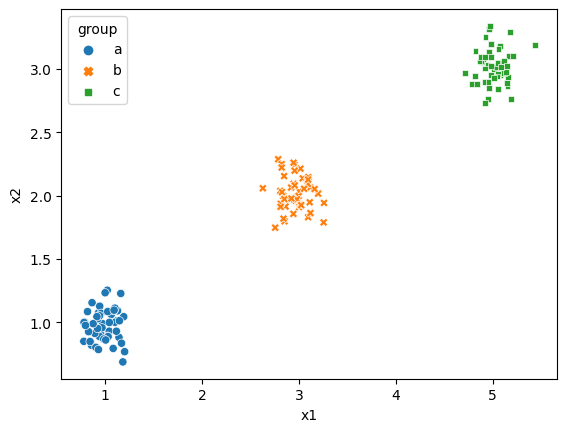

In [17]:
sns.scatterplot(data = df0_125, x = 'x1',y='x2',hue='group',style='group')

<Axes: xlabel='x1', ylabel='x2'>

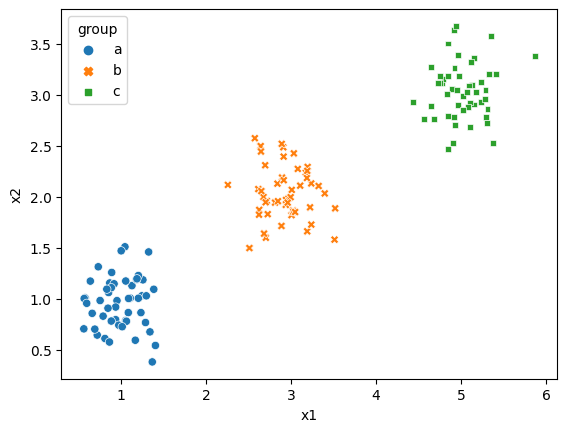

In [18]:
sns.scatterplot(data = df0_25, x = 'x1',y='x2',hue='group',style='group')

<Axes: xlabel='x1', ylabel='x2'>

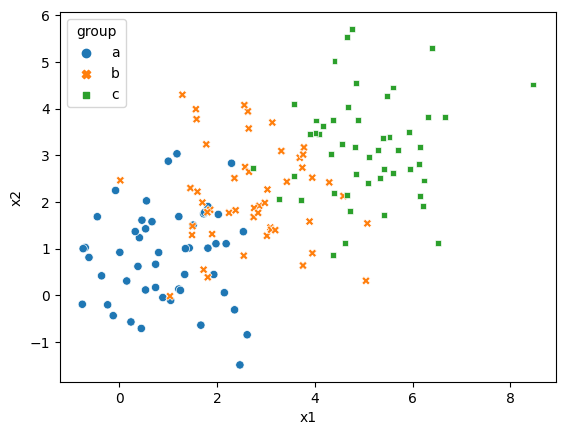

In [19]:
sns.scatterplot(data = df1_0, x = 'x1',y='x2',hue='group',style='group')

<Axes: xlabel='x1', ylabel='x2'>

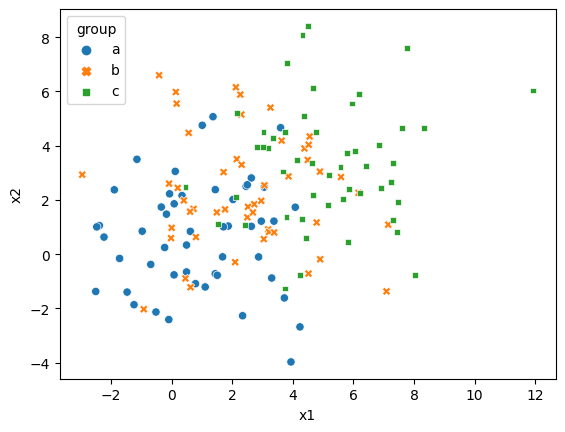

In [20]:
sns.scatterplot(data = df2_0, x = 'x1',y='x2',hue='group',style='group')

2. As the noise goes up from 0.125 to 2.0, what happens to the visual distinctness of the clusters? As the noise increases, it becomes increasingly difficult to see the distinct groups. At df2_0, it becomes impossible to discern a clusters

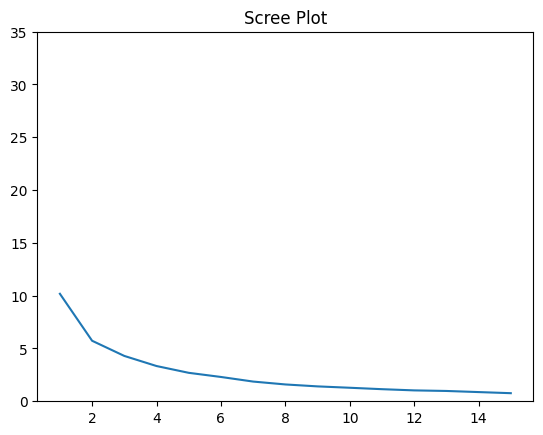

In [21]:

# Max-min scaler function
def maxmin(x):
    return (x - min(x)) / (max(x) - min(x))

# Sample data
data = df0_25
data = df0_5
data = df1_0
data = df2_0




# Preprocess the data
X = data.loc[:, ['x1', 'x2']].apply(maxmin)

# Create a scree plot
k_bar = 15
k_grid = np.arange(1, k_bar + 1)
SSE = np.zeros(k_bar)

for k in range(k_bar):
    model = KMeans(n_clusters=k + 1, max_iter=300, n_init=10, random_state=0)
    model = model.fit(X)
    SSE[k] = model.inertia_

# Create scree plot directly
scree_plot, axes = plt.subplots()
sns.lineplot(x=k_grid, y=SSE).set_title('Scree Plot')
axes.set_ylim(0, 35)

# Display the plot
plt.show()



3. For df0_125, df0_25 df0_5, k appears to be 3.df1_0, and for df2_0 an elbow isn't easaily noticable.



4. The elbow method is like figuring out how many groups make sense for your data. It lies in assessing the best number of clusters based on the relstionship between the variance and the simplicity of a model. As noise increases, clusters spread out and become visually indistinct, which we saw in the graphs we made. This is reflected in the scree plot as a less pronounced elbow. The elbow method is effective when clusters are well-defined and visually distinct, leading to a clear and pronounced elbow in the scree plot. However, as clusters become less distinct due to noise or overlapping patterns, the elbow may become more difficult to see.  In our data, df2_0 had the most noise, and the most overlap between data points wich led to it having the least recognizable elbow.





**Q7.** We looked at computer vision with $k$NN in a previous question. Can $k$ means clustering correctly group digits, even if we don't know which symbols are which?

1. To load the data, run the following code in a chunk:
```
from keras.datasets import mnist
df = mnist.load_data('minst.db')
train,test = df
X_train, y_train = train
X_test, y_test = test
```
The `y_test` and `y_train` vectors, for each index `i`, tell you want number is written in the corresponding index in `X_train[i]` and `X_test[i]`. The value of `X_train[i]` and `X_test[i]`, however, is a 28$\times$28 array whose entries contain values between 0 and 256. Each element of the matrix is essentially a "pixel" and the matrix encodes a representation of a number. To visualize this, run the following code to see the first ten numbers:
```
import matplotlib.pyplot as plt
import numpy as np
np.set_printoptions(edgeitems=30, linewidth=100000)
for i in range(5):
    print(y_test[i],'\n') # Print the label
    print(X_test[i],'\n') # Print the matrix of values
    plt.contourf(np.rot90(X_test[i].transpose())) # Make a contour plot of the matrix values
    plt.show()
```
OK, those are the data: Labels attached to handwritten digits encoded as a matrix.

2. What is the shape of `X_train` and `X_test`? What is the shape of `X_train[i]` and `X_test[i]` for each index `i`? What is the shape of `y_train` and `y_test`?
3. Use Numpy's `.reshape()` method to covert the training and testing data from a matrix into an vector of features. So, `X_test[index].reshape((1,784))` will convert the $index$-th element of `X_test` into a $28\times 28=784$-length row vector of values, rather than a matrix. Turn `X_train` into an $N \times 784$ matrix $X$ that is suitable for scikit-learn's kNN classifier where $N$ is the number of observations and $784=28*28$ (you could use, for example, a `for` loop).
4. Use $k$ means clustering on the reshaped `X_test` data with `k=10`.  
5. Cross tabulate the cluster assignments with the true labels for the test set values. How good is the correspondence? What proportion of digits are clustered correctly? Which digits are the hardest to distinguish from one another? Can $k$MC recover the latent digits 0 to 9, without even knowing what those digits were?
6. If you use a scree plot to determine the number of clusters $k$, does it pick 10 (the true number of digits), or not? If it fails to pick $k=10$, which digits does it tend to combine into the same classification?

In [22]:
from keras.datasets import mnist
df = mnist.load_data('minst.db')
train,test = df
X_train, y_train = train
X_test, y_test = test

11490434/11490434 [==============================] - 0s 0us/step


7 

[[  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0  84 185 159 151  60  36   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0 222 254 254 254 254 241 198 198 198 198 198 198 19

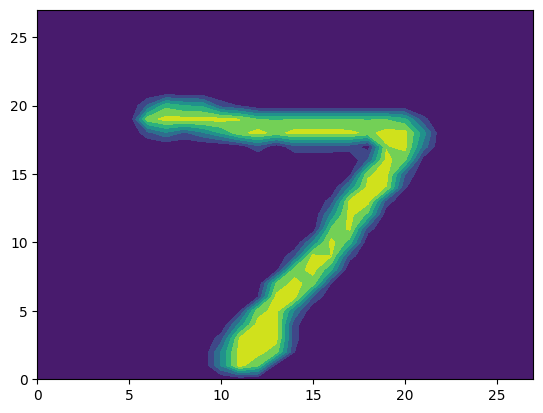

2 

[[  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0 116 125 171 255 255 150  93   0   0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0 169 253 253 253 253 253 253 218  30   0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0 169 253 253 253 213 142 176 253 253 122   0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0  52 250 253 210  32  12   0   6 206 253 140   0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0  77 251 210  25   0   0   0 122 248 253  65   0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0  31  18   0   0   0   0 209 253 253  65   

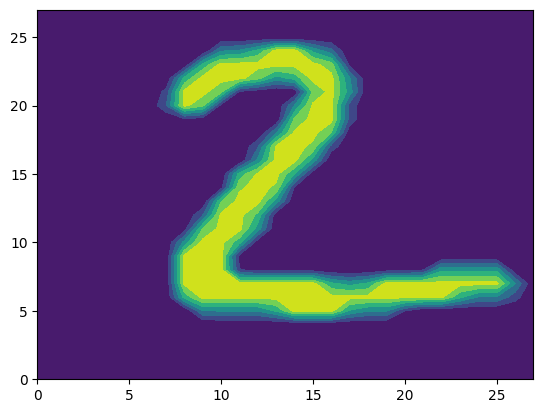

1 

[[  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0  38 254 109   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0  87 252  82   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0 135 241   0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0  45 244 150   0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0  84 254  63   

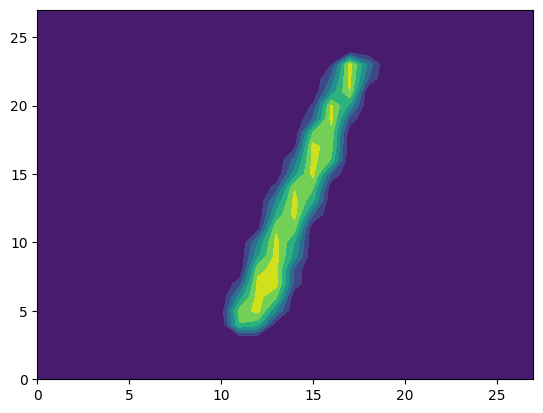

0 

[[  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0  11 150 253 202  31   0   0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0  37 251 251 253 107   0   0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0  21 197 251 251 253 107   0   0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0 110 190 251 251 251 253 169 109  62   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0 253 251 251 251 251 253 251 251 22

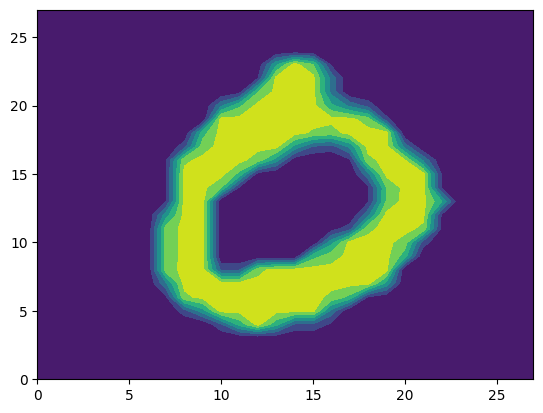

4 

[[  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0  50 224   0   0   0   0   0   0   0  70  29   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0 121 231   0   0   0   0   0   0   0 148 168   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   4 195 231   0   0   0   0   0   0   0  96 210  11   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0  69 252 134   0   0   0   0   0   0   

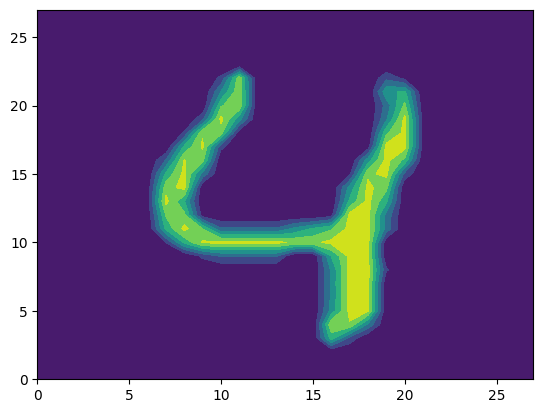

In [23]:
import matplotlib.pyplot as plt
import numpy as np
np.set_printoptions(edgeitems=30, linewidth=100000)
for i in range(5):
 print(y_test[i],'\n') # Print the label
 print(X_test[i],'\n') # Print the matrix of values
 plt.contourf(np.rot90(X_test[i].transpose())) # Make a contour plot of the matrix values
 plt.show()